In [5]:
import sympy as sp

sp.init_printing()

# 03_StellarDynamics_HW_Chap04

In class, we discussed the formation of a protostar, Hayashi track.
There are three different state of Hayashi track.Your mission is
- A)The relationship among surface temperature, stellar mass and stellar radius in different state of Hayashi track. (45%)
- B)A)The relationship among luminosity, stellar mass and stellar radius in different state of Hayashi track. (45%)
- C)Explain the mechanism of Hayashi track, why we can roughly disassemble the Hayashi track and what is the difference among the three states?(10%)

Hint: The answers of A and B are polynomials. What you have to do is to find out the power of mass and radius.  

In [128]:
L, T, M, P, kappa = sp.symbols('L T M P kappa')

# expression of luminosity
exprL = sp.Eq(L, sp.simplify('4 * pi * R^2 * T^4 * c'))
exprL

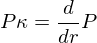

In [98]:
exprDp = sp.Derivative(P, sp.simplify('r'))
exprDp = sp.Eq(kappa * P, exprDp)
exprDp

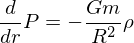

In [99]:
# gavitation 
exprGrav = sp.simplify('- G * m * rho / R^2')
exprGrav = sp.Eq(exprDp.rhs, exprGrav)
exprGrav

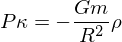

In [100]:
# substitute dP / dr
exprDp = exprDp.subs({exprDp.rhs: exprGrav.rhs})
exprDp

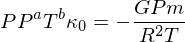

In [101]:
# substitute kappa and rho
exprDp = exprDp.subs({kappa : sp.simplify('kappa_0 * P^a * T^b'), 
                      sp.simplify('rho') : P / T})
exprDp

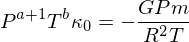

In [102]:
# simplify the expression
exprDp = sp.simplify(exprDp)
exprDp

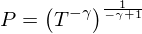

In [103]:
# Adiabatic process
gamma = sp.Symbol('gamma')
exprP = (T**(-gamma))**(1 / (1 - gamma))
sp.Eq(P, exprP)

In [104]:
# for gamma = 5/3
exprP = sp.powdenest(exprP.subs(gamma, 5 / 3), force=1)
sp.Eq(P, exprP)

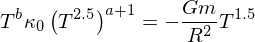

In [105]:
# substitute back into the exprDp
exprDp = exprDp.subs(P, exprP)
exprDp

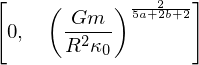

In [107]:
# solve for T
exprSolveT = sp.solve(exprDp, T, rational=0)
exprSolveT

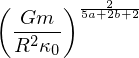

In [108]:
# it seems we only need second solution
exprSolveT = exprSolveT[1]
exprSolveT

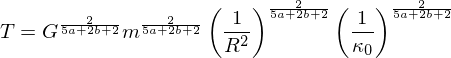

In [109]:
# expand powers based on bases
exprSolveT = sp.expand_power_base(exprSolveT, force=1)
sp.Eq(T, exprSolveT)

The above equation stands for the relation between $T$ and $R, m$ based on power law.

In [129]:
# recall this equation
exprL

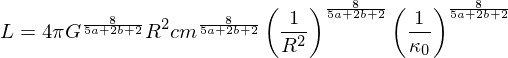

In [130]:
# substitute T with exprSolveT, the T relation based on R and m
exprSolveL = exprL.subs(T, exprSolveT)
exprSolveL

Let's simplify both L and T expressions for taking all constants to be 1.

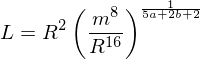

In [133]:
# simplify L
exprSolveL = exprSolveL.subs({'4 * pi' : 1, 'G' : 1, 'c' : 1, 
                 'kappa_0' : 1})
sp.powsimp(exprSolveL, deep=1, force=1)

Oh... this is the expression the program thinks is the most simplistic...

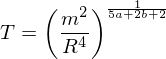

In [135]:
# simplify T
exprSolveT = exprSolveT.subs({'G' : 1, 'kappa_0' : 1})
exprSolveT = sp.powsimp(exprSolveT, deep=1, force=1)
exprSolveT = sp.Eq(T, exprSolveT)
exprSolveT

# Question 1
Use expression of $T$ with $a, b$ in different stages:

|stages| `a` | `b` |
| ---- | --- | --- |
| (1)  | 0.7 | 0.6 | 
| (2)  | 5.3 | 9.4 |

(BYW, did 老闕 provided `a` `b` for stage (3)?)

In [ ]:
# 1) low-density stage 
